# **Análise do Dataset de Pokémon**

O objetivo é responder algumas perguntas de negócio sobre um dataset de Pokémon.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Carregando os dados**

In [2]:
df = pd.read_csv('pokemon_data.csv')

In [3]:
df.shape

(800, 12)

In [4]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


### **Análise Exploratória**

In [5]:
# Verifica o tipo de dado de cada coluna
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [7]:
# Resumo estatístico das colunas de inteiros
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
# Verifica de há valores ausentes
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

É normal que 'Type 2' tenha valores ausentes, visto que existem Pokémons com apenas um tipo. 

### **Pergunta de Negócio 1:** <br>Qual a distribuição dos tipos primários (Type 1) de Pokémon? E qual a distribuição total dos tipos de Pokémon, considerando Type 1 e Type 2?

In [9]:
# Contagem por tipo 1
df1 = df.groupby(['Type 1']).count()['#']
df1

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: #, dtype: int64

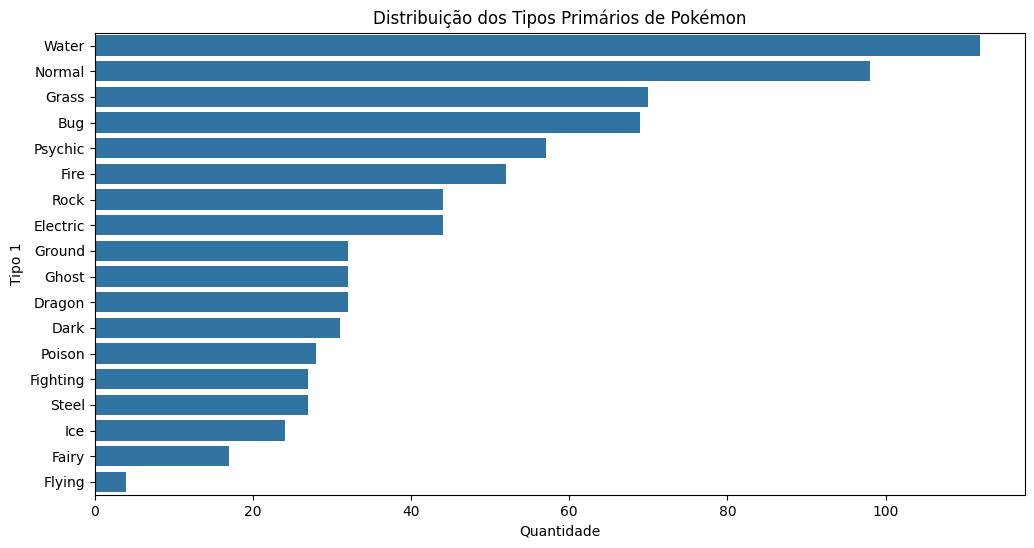

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Type 1'], order=df['Type 1'].value_counts().index)
plt.xlabel("Quantidade")
plt.ylabel("Tipo 1")
plt.title("Distribuição dos Tipos Primários de Pokémon")
plt.show()

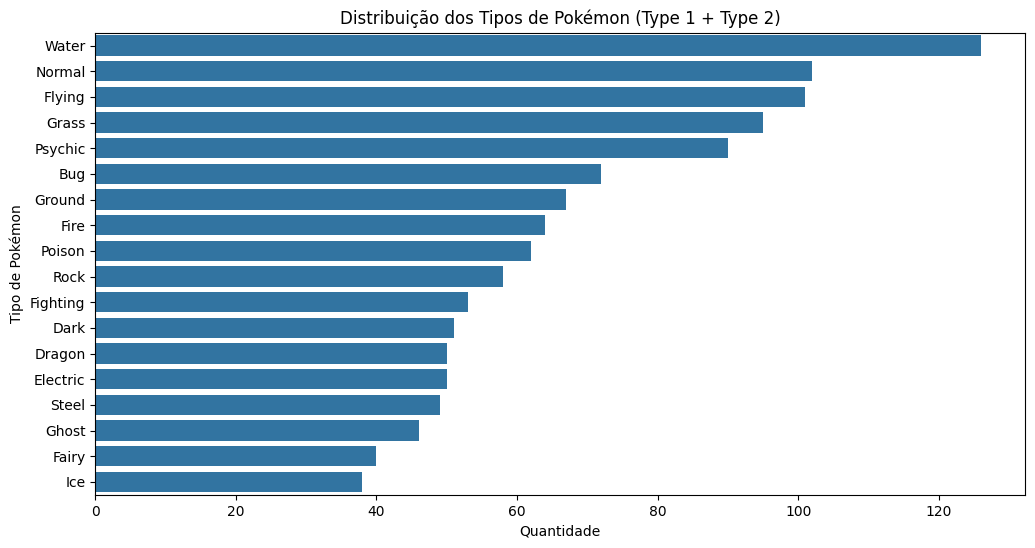

In [ ]:
# Unir Type 1 e Type 2 em uma única coluna para contagem e conta a ocorrência de cada tipo
todos_tipos = pd.concat([df['Type 1'], df['Type 2']]).dropna().value_counts()

# Cria o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(y=todos_tipos.index, x=todos_tipos.values)
plt.ylabel("Tipo de Pokémon")
plt.xlabel("Quantidade")
plt.title("Distribuição dos Tipos de Pokémon (Type 1 + Type 2)")
plt.show()

### **Pergunta de Negócio 2:** <br>Qual o Pokémon com maior HP? E com maior ataque?

In [12]:
maior_atk = df.loc[df['Attack'].idxmax(), ['Name', 'Attack']]
maior_hp = df.loc[df['HP'].idxmax(), ['Name', 'HP']]
print(f'Pokémon com o maior ataque: {maior_atk['Name']} ({maior_atk['Attack']})')
print(f'Pokémon com o maior HP: {maior_hp['Name']} ({maior_hp['HP']})')

Pokémon com o maior ataque: MewtwoMega Mewtwo X (190)
Pokémon com o maior HP: Blissey (255)


### **Pergunta de Negócio 3:** <br>Qual a média de cada atributo de status (HP, Attack, Defense, etc.) por geração?

In [13]:
df3 = df.groupby('Generation')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
df3

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
6,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


<Figure size 1200x600 with 0 Axes>

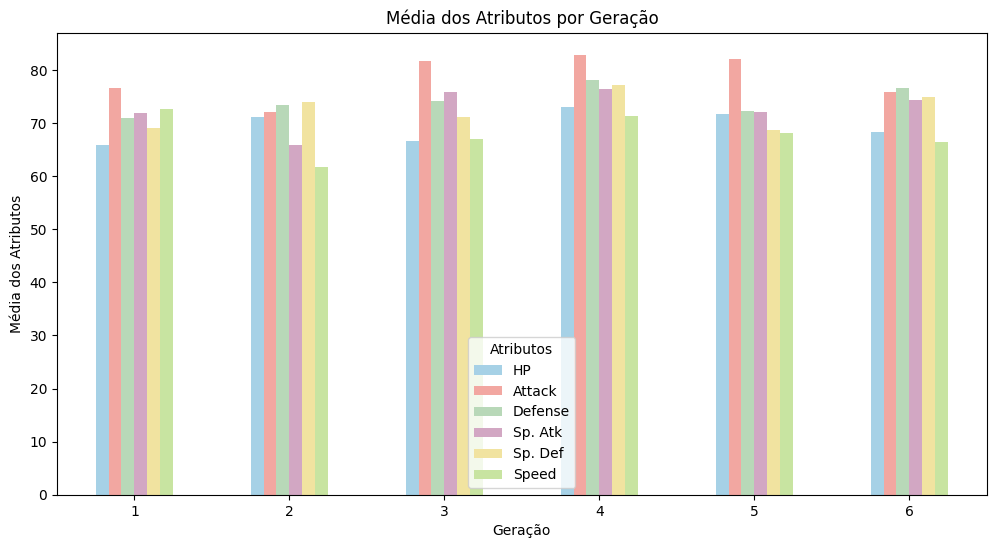

In [14]:
cores = ['#A6D1E6', '#F2A7A1', '#B8D8B8', '#D2A7C3', '#F1E3A0', '#C8E4A1']
plt.figure(figsize=(12, 6))
df3.plot(kind='bar', figsize=(12, 6), color=cores)
plt.title("Média dos Atributos por Geração")
plt.xlabel("Geração")
plt.ylabel("Média dos Atributos")
plt.xticks(rotation=0)
plt.legend(title="Atributos")
plt.show()

### **Pergunta de Negócio 4:** <br>Quantos Pokémon possuem um segundo tipo (Type 2) e quantos não possuem?

In [15]:
df4 = df["Type 2"].notna().value_counts()
print(f'Quantidade de Pokémons que possuem um segundo tipo: {df4[True]}\nQuantidade de Pokémons que não possuem um segundo tipo: {df4[False]}')

Quantidade de Pokémons que possuem um segundo tipo: 414
Quantidade de Pokémons que não possuem um segundo tipo: 386


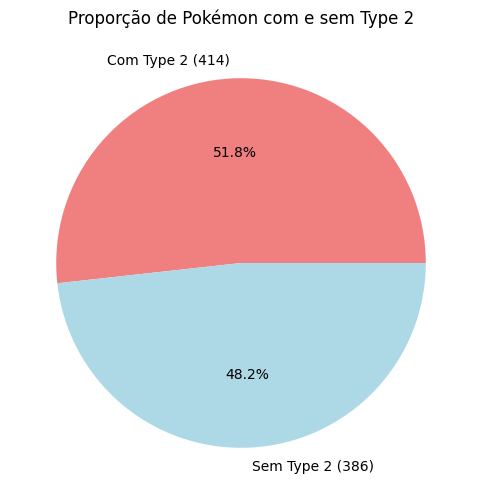

In [16]:
plt.figure(figsize=(6,6))
df4.plot.pie(autopct="%1.1f%%", labels=[f"Com Type 2 ({df4[True]})", f"Sem Type 2 ({df4[False]})"], colors=['lightcoral', 'lightblue'])
plt.title("Proporção de Pokémon com e sem Type 2")
plt.ylabel("")
plt.show()

### **Pergunta de Negócio 5:** <br>Pokémon lendários possuem atributos significativamente maiores que os não lendários?

In [17]:
df5 = df.groupby('Legendary')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
df5

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Legendary,,,,,,
False,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
True,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615


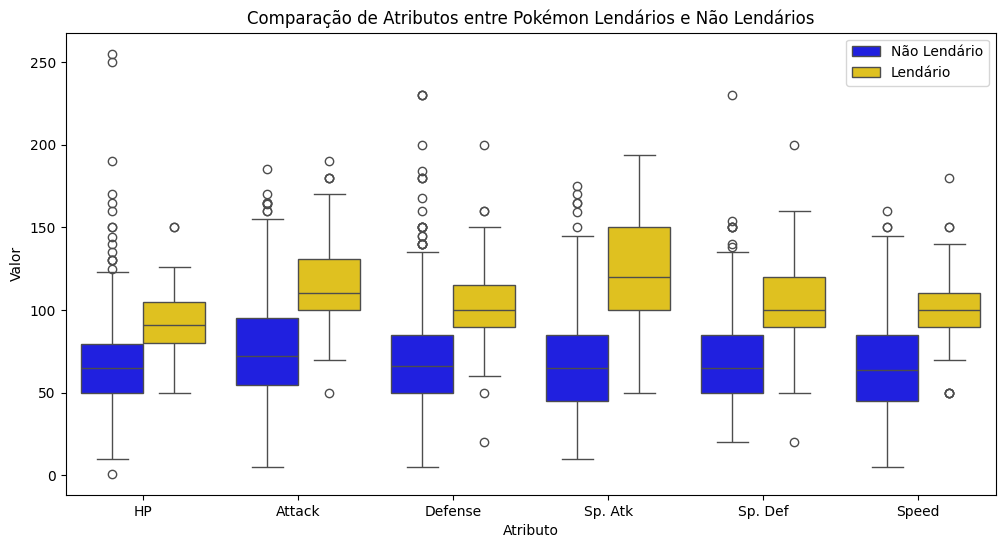

In [18]:
# "Derreter" o DataFrame, de formato largo para formato longo
df_melted = df.melt(id_vars=['Legendary'], value_vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], var_name='Atributo', value_name='Valor')

# Criando o gráfico
plt.figure(figsize=(12,6))
sns.boxplot(x='Atributo', y='Valor', hue='Legendary', data=df_melted, palette={False: 'blue', True: 'gold'})
plt.title("Comparação de Atributos entre Pokémon Lendários e Não Lendários")
plt.xlabel("Atributo")
plt.ylabel("Valor")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Não Lendário", "Lendário"])
plt.show()

### **Pergunta de Negócio 6:** <br>Qual tipo de Pokémon (Type 1) tem, em média, o maior valor de ataque? E defesa?

In [19]:
# Agrupando as médias de Attack e Defense para cada tipo e ordenando baseado no Attack 
df6 = df.groupby('Type 1')[['Attack', 'Defense']].mean().sort_values('Attack')
df6

,Attack,Defense
Type 1,,
Fairy,61.529412,65.705882
Electric,69.090909,66.295455
Bug,70.971014,70.724638
Psychic,71.456140,67.684211
Ice,72.750000,71.416667
Grass,73.214286,70.800000
Normal,73.469388,59.846939
Ghost,73.781250,81.187500
Water,74.151786,72.946429


<Figure size 1200x600 with 0 Axes>

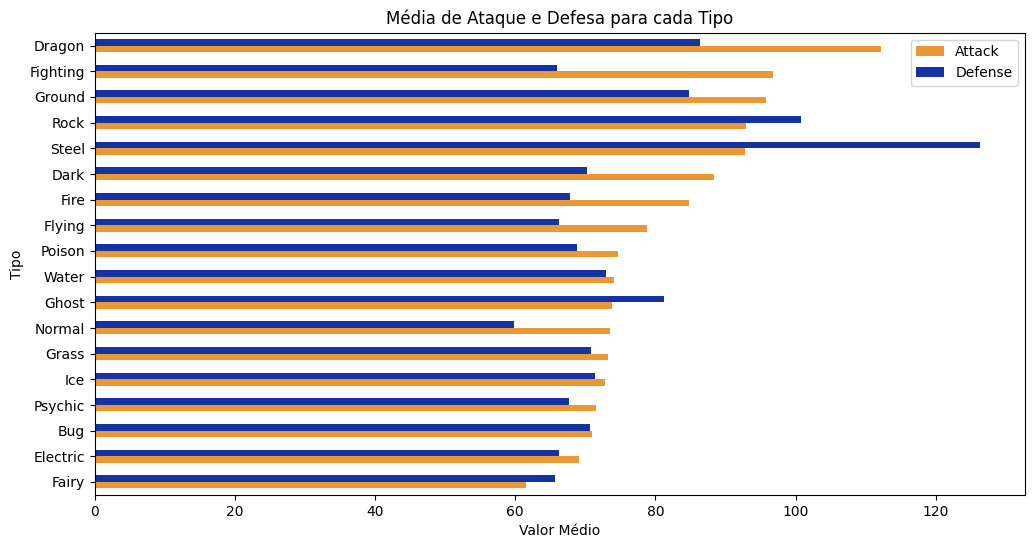

In [20]:
plt.figure(figsize=(12, 6))
df6.plot(kind='barh', figsize=(12, 6), color=['#eb9834', '#1532a3'])
plt.title("Média de Ataque e Defesa para cada Tipo")
plt.xlabel("Valor Médio")
plt.ylabel("Tipo")
plt.show()

### **Pergunta de Negócio 7:** <br>Qual a distribuição de velocidade entre Pokémon das diferentes gerações?

In [21]:
# Uma distribuição através da média
df7 = df.groupby('Generation')['Speed'].mean()
df7

Generation
1    72.584337
2    61.811321
3    66.925000
4    71.338843
5    68.078788
6    66.439024
Name: Speed, dtype: float64

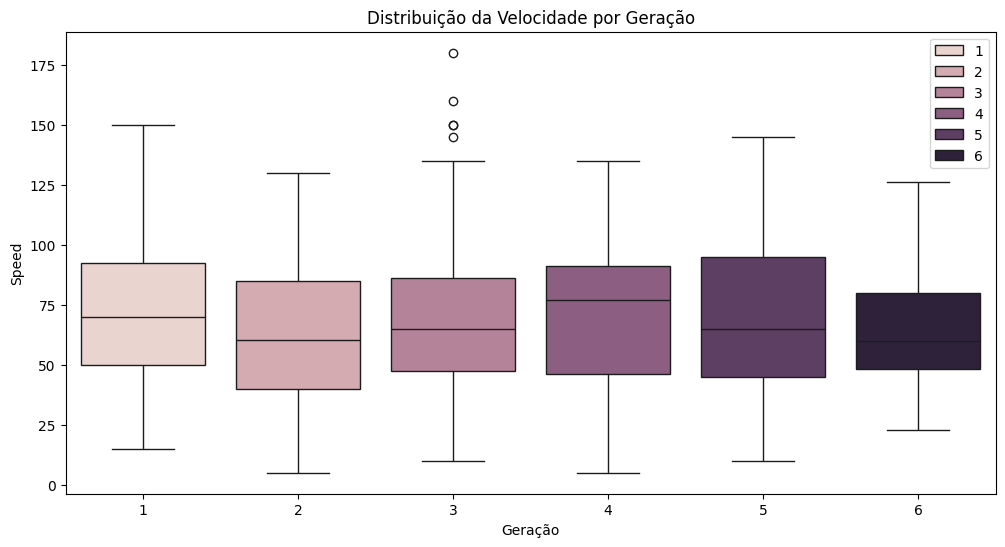

In [22]:
# "Derreter" o DataFrame, de formato largo para formato longo
df_melted = df.melt(id_vars=['Generation'], value_vars=['Speed'], var_name='Atributo', value_name='Valor')

# Criando o gráfico boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Generation', y='Valor', hue='Generation', data=df_melted)
plt.title("Distribuição da Velocidade por Geração")
plt.xlabel("Geração")
plt.ylabel("Speed")
plt.legend()
plt.show()

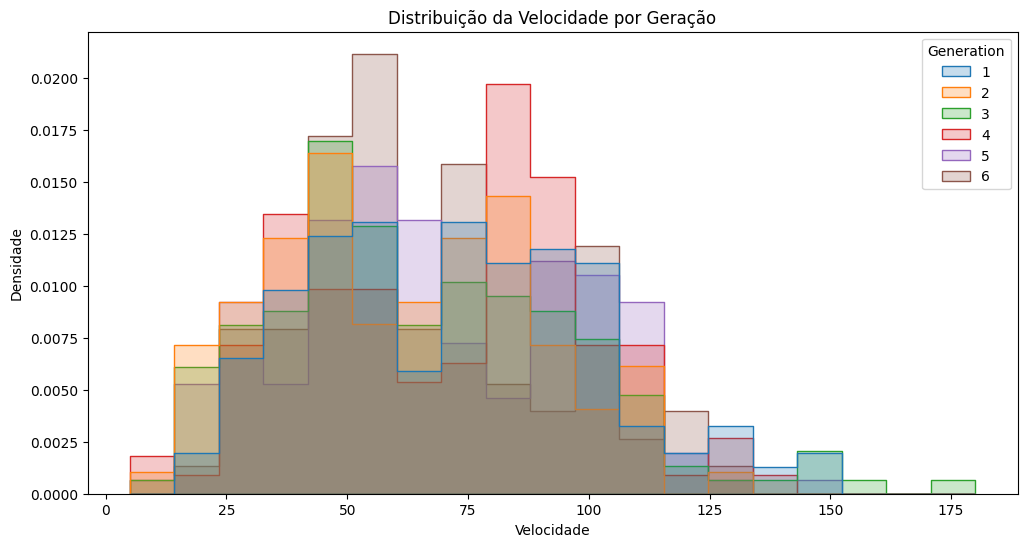

In [23]:
# Visualização através de histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Speed", hue="Generation", element="step", stat="density", common_norm=False, palette="tab10")
plt.title("Distribuição da Velocidade por Geração")
plt.xlabel("Velocidade")
plt.ylabel("Densidade")
plt.show()

### **Pergunta de Negócio 8:** <br>Existe correlação entre ataque e defesa? E entre HP e velocidade?

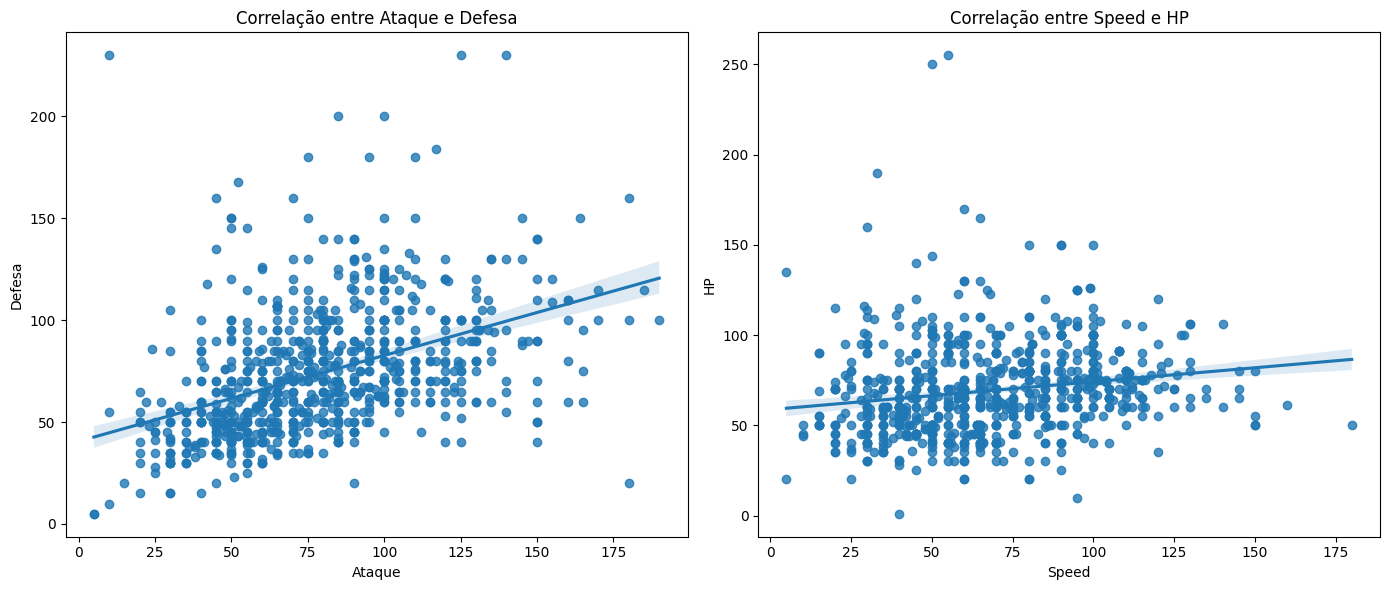

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico da correlação entre Ataque e Defesa
sns.regplot(x='Attack', y='Defense', data=df, ax=axs[0])
axs[0].set_title("Correlação entre Ataque e Defesa")
axs[0].set_xlabel("Ataque")
axs[0].set_ylabel("Defesa")

# Gráfico da correlação entre Speed e HP
sns.regplot(x='Speed', y='HP', data=df, ax=axs[1])
axs[1].set_title("Correlação entre Speed e HP")
axs[1].set_xlabel("Speed")
axs[1].set_ylabel("HP")

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### **Pergunta de Negócio 9:** <br>Como a distribuição dos atributos mudou entre as diferentes gerações?

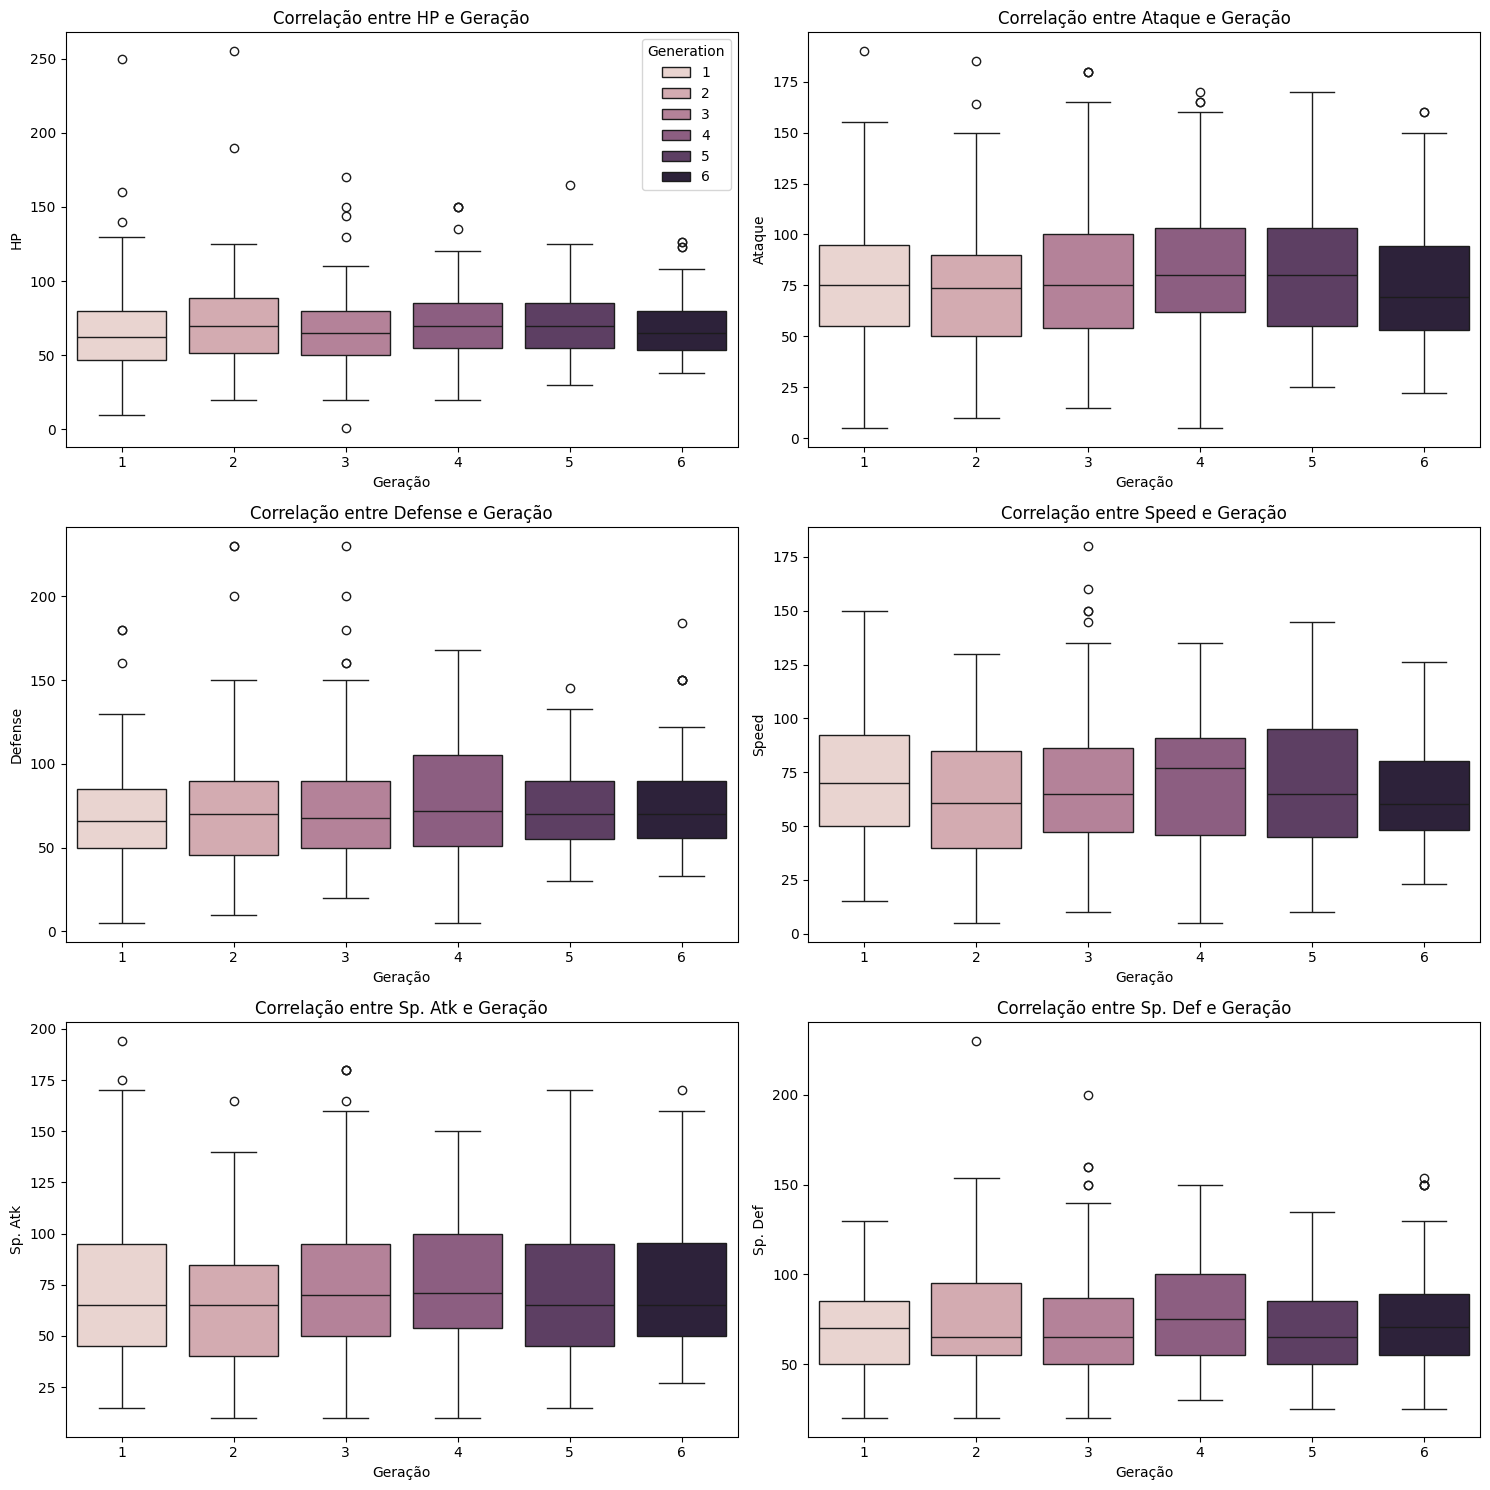

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Gráfico da correlação entre HP e Gerações
sns.boxplot(x='Generation', y='HP', data=df, hue='Generation', ax=axs[0, 0])
axs[0, 0].set_title("Correlação entre HP e Geração")
axs[0, 0].set_xlabel("Geração")
axs[0, 0].set_ylabel("HP")

# Gráfico da correlação entre Ataque e Gerações
sns.boxplot(x='Generation', y='Attack', data=df, hue='Generation', ax=axs[0, 1], legend=False)
axs[0, 1].set_title("Correlação entre Ataque e Geração")
axs[0, 1].set_xlabel("Geração")
axs[0, 1].set_ylabel("Ataque")

# Gráfico da correlação entre Defense e Gerações
sns.boxplot(x='Generation', y='Defense', data=df, hue='Generation', ax=axs[1, 0], legend=False)
axs[1, 0].set_title("Correlação entre Defense e Geração")
axs[1, 0].set_xlabel("Geração")
axs[1, 0].set_ylabel("Defense")

# Gráfico da correlação entre Speed e Gerações
sns.boxplot(x='Generation', y='Speed', data=df, hue='Generation', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Correlação entre Speed e Geração")
axs[1, 1].set_xlabel("Geração")
axs[1, 1].set_ylabel("Speed")

# Gráfico da correlação entre Sp. Atk e Gerações
sns.boxplot(x='Generation', y='Sp. Atk', data=df, hue='Generation', ax=axs[2, 0], legend=False)
axs[2, 0].set_title("Correlação entre Sp. Atk e Geração")
axs[2, 0].set_xlabel("Geração")
axs[2, 0].set_ylabel("Sp. Atk")

# Gráfico da correlação entre Sp. Def e Gerações
sns.boxplot(x='Generation', y='Sp. Def', data=df, hue='Generation', ax=axs[2, 1], legend=False)
axs[2, 1].set_title("Correlação entre Sp. Def e Geração")
axs[2, 1].set_xlabel("Geração")
axs[2, 1].set_ylabel("Sp. Def")


plt.tight_layout()
plt.show()

### **Pergunta de Negócio 10:** <br>Quais combinações de tipos (Type 1 e Type 2) são mais comuns?

In [26]:
df10 = df.groupby(['Type 1', 'Type 2'])['#'].count().sort_values(ascending=False)
df10

Type 1  Type 2  
Normal  Flying      24
Grass   Poison      15
Bug     Flying      14
        Poison      12
Ghost   Grass       10
                    ..
Rock    Fighting     1
Steel   Fighting     1
        Flying       1
        Dragon       1
Water   Steel        1
Name: #, Length: 136, dtype: int64

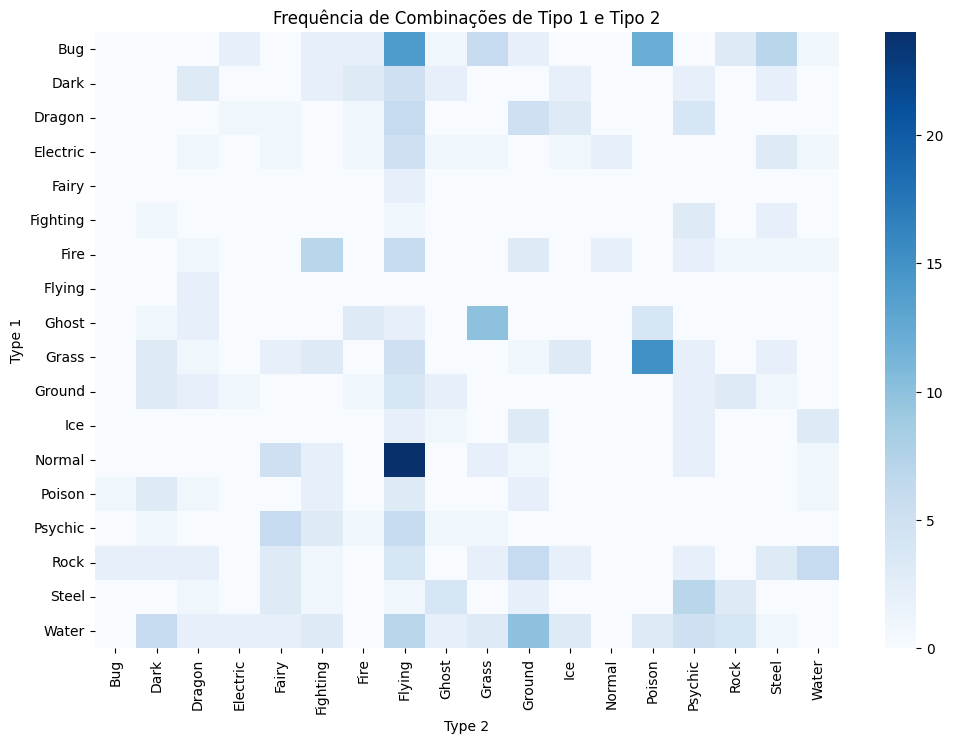

In [27]:
# Conta a frequência das combinações únicas entre 'Type 1' e 'Type 2' e organiza em uma tabela, preenchendo valores ausentes com 0.
df10 = df.groupby(['Type 1', 'Type 2']).size().unstack().fillna(0)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df10, cmap="Blues", annot=False)
plt.title("Frequência de Combinações de Tipo 1 e Tipo 2")
plt.xlabel("Type 2")
plt.ylabel("Type 1")
plt.show()

A combinação mais comun é Normal e Flying.